In [ ]:
# Theoretica Mechanics II
# Homework I
# Exercise I.
# Free fall phenomena considering Coriolis and Centrifugal Force's
# when the falling object has an initial velocity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

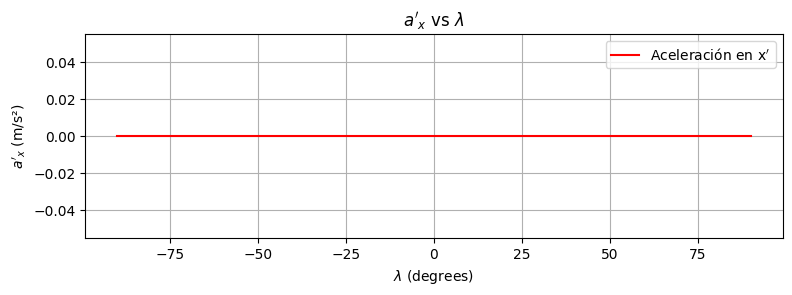

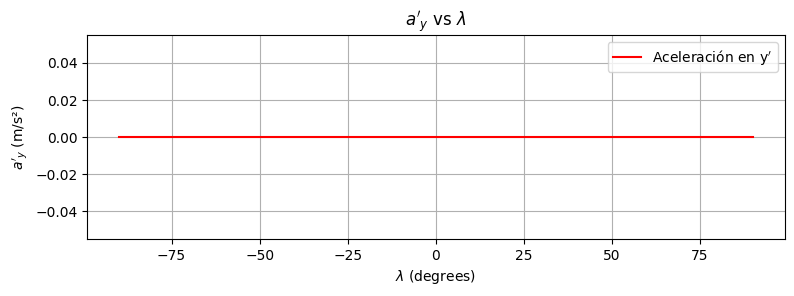

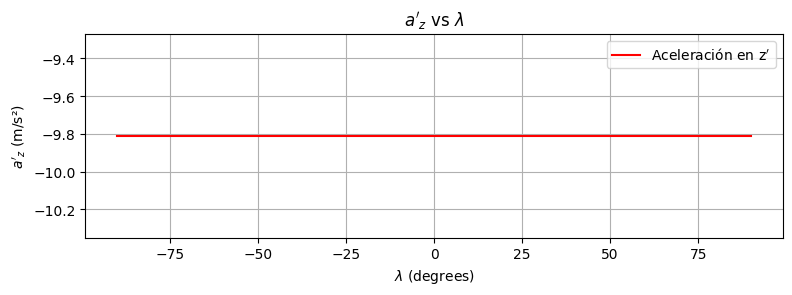

In [ ]:
# Acceleration plots
# c.1) Only considering the punctual object gravitational force
# for latitude \lambda
# constants
H = 10.0 # m
v = -5.0 # m/s
g0 = 9.81 # m/s^2
omega = 7.5e-5 # rad

lamda = np.linspace(-90, 90, 500)  # lat in degrees
phi = np.linspace(0, 180 / 2, 500) # long

acceleration_x = np.zeros_like(lamda)
acceleration_y = np.zeros_like(lamda)  # Zero acceleration in x and y-direction because the initial velocity components are zero
acceleration_z = -g0 * np.ones_like(lamda)  # Constant gravitational acceleration in z-direction

# Plots
# Plotting each acceleration component individually

# Plot for acceleration_x
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(lamda, acceleration_x, label='Aceleración en x$\'$', color='red')
plt.xlabel('$\lambda$ (degrees)')
plt.ylabel('$a\' _x$ (m/s²)')
plt.title('$a\' _x$ vs $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

# Plot for acceleration_y (which is 0)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 2)
plt.plot(lamda, acceleration_y, label='Aceleración en y$\'$', color='red')
plt.xlabel('$\lambda$ (degrees)')
plt.ylabel('$a\' _y$ (m/s²)')
plt.title('$a\' _y$ vs $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

# Plot for acceleration_z
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 3)
plt.plot(lamda, acceleration_z, label='Aceleración en z$\'$', color='red')
plt.xlabel('$\lambda$ (degrees)')
plt.ylabel('$a\' _z$ (m/s²)')
plt.title('$a\' _z$ vs $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

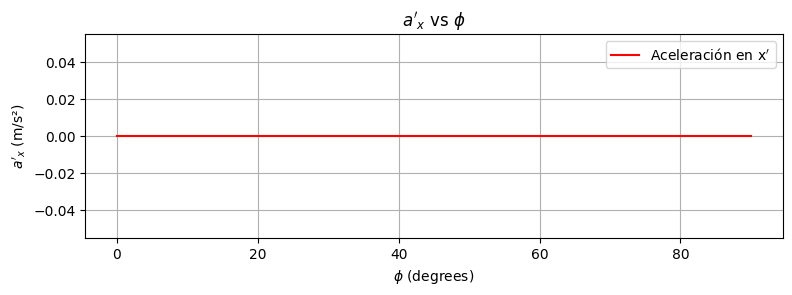

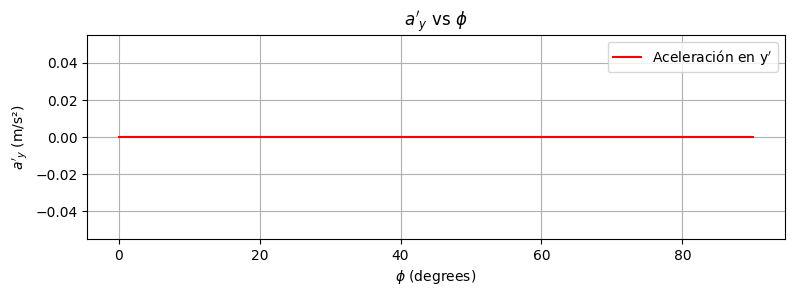

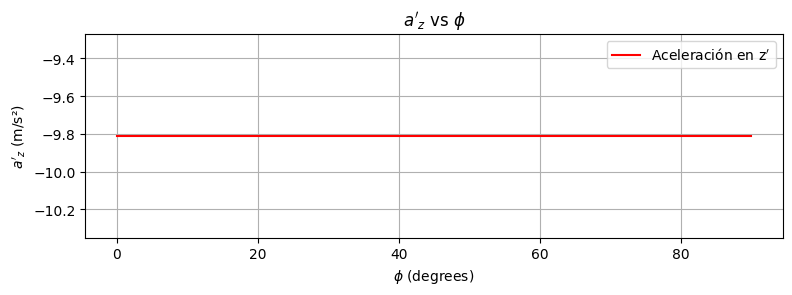

In [ ]:
# Longitude plots
# Plotting each acceleration component individually

# Plot for acceleration_x
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(phi, acceleration_x, label='Aceleración en x$\'$', color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _x$ (m/s²)')
plt.title('$a\' _x$ vs $\phi$')
plt.legend()
plt.grid(True)
plt.show()

# Plot for acceleration_y (which is 0)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 2)
plt.plot(phi, acceleration_y, label='Aceleración en y$\'$', color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _y$ (m/s²)')
plt.title('$a\' _y$ vs $\phi$')
plt.legend()
plt.grid(True)
plt.show()

# Plot for acceleration_z
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 3)
plt.plot(phi, acceleration_z, label='Aceleración en z$\'$', color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _z$ (m/s²)')
plt.title('$a\' _z$ vs $\phi$')
plt.legend()
plt.grid(True)
plt.show()

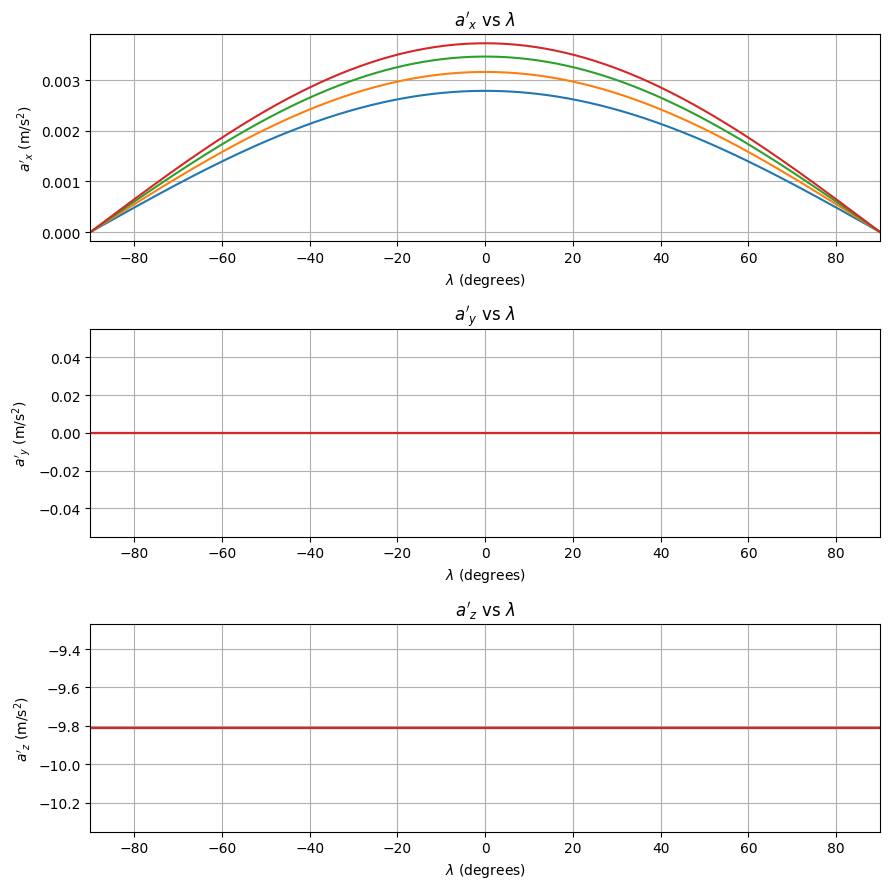

In [ ]:
# c.2) Para Coriolis

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = (v)**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (-v + np.sqrt(discriminant)) / g0
    t2 = (-v - np.sqrt(discriminant)) / g0
    # We only want the positive time
    return max(t1, t2)

# Function to calculate accelerations
def accelerations(lamda, t):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    # X-acceleration due to Coriolis effect
    acceleration_x = -2 * omega * (v - g0 * t) * np.cos(lamda_rad)
    # Y-acceleration (in this setup it's 0)
    acceleration_y = 0
    # Z-acceleration due to gravity is constant
    acceleration_z = -g0
    return acceleration_x, acceleration_y, acceleration_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each acceleration component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        acc_x, acc_y, acc_z = accelerations(lamda, t)

        # Plot x-acceleration vs lambda
        axs[0].plot(lamda, acc_x, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$a\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$a\' _x$ (m/s$^2$)')
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-acceleration vs lambda (constant 0, just for completion)
        axs[1].plot(lamda, np.zeros_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$a\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$a\' _y$ (m/s$^2$)')
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-acceleration vs lambda (constant -g0)
        axs[2].plot(lamda, acc_z * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$a\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$a\' _z$ (m/s$^2$)')
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

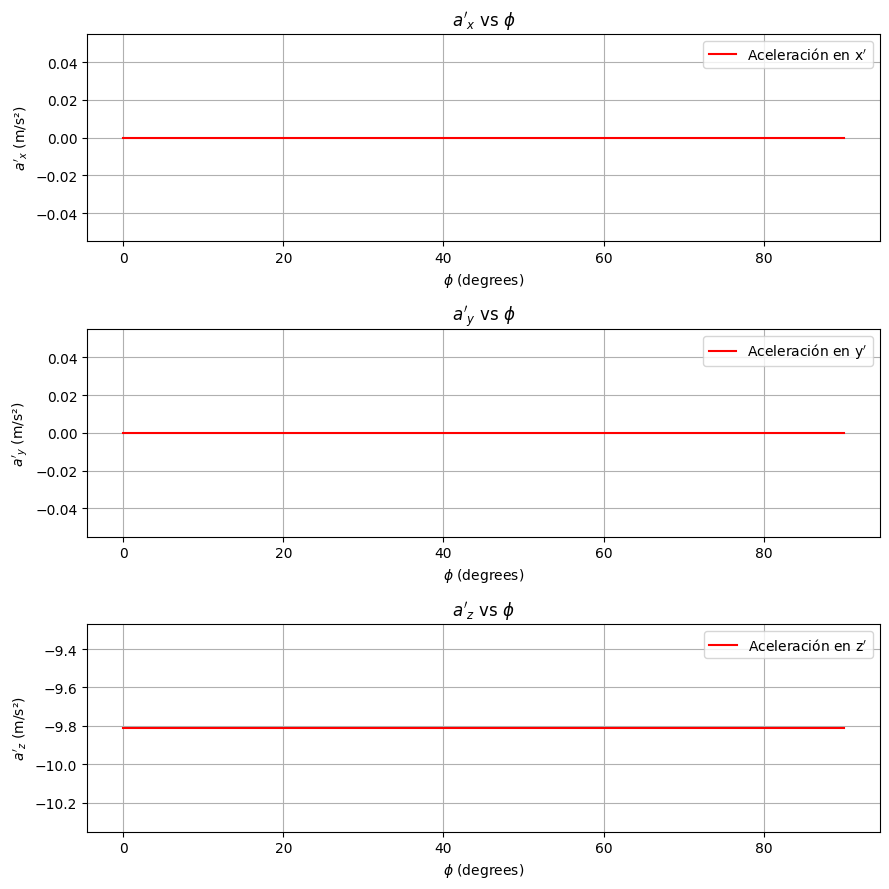

In [ ]:
# Calculate accelerations in long
acceleration_x = -2 * omega * v * np.cos(np.radians(lamda)) * np.zeros_like(phi)  # X-acceleration
acceleration_y = np.zeros_like(phi)  # Y-acceleration is zero
acceleration_z = -g0 * np.ones_like(phi)  # Constant Z-acceleration

# Plot for acceleration_x
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(phi, acceleration_x, label='Aceleración en x$\'$', color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _x$ (m/s²)')
plt.title('$a\' _x$ vs $\phi$')
plt.legend()
plt.grid(True)

# Plot for acceleration_y (which is 0)
plt.subplot(3, 1, 2)
plt.plot(phi, acceleration_y, label='Aceleración en y$\'$', color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _y$ (m/s²)')
plt.title('$a\' _y$ vs $\phi$')
plt.legend()
plt.grid(True)

# Plot for acceleration_z
plt.subplot(3, 1, 3)
plt.plot(phi, acceleration_z, label='Aceleración en z$\'$', color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _z$ (m/s²)')
plt.title('$a\' _z$ vs $\phi$')
plt.legend()
plt.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

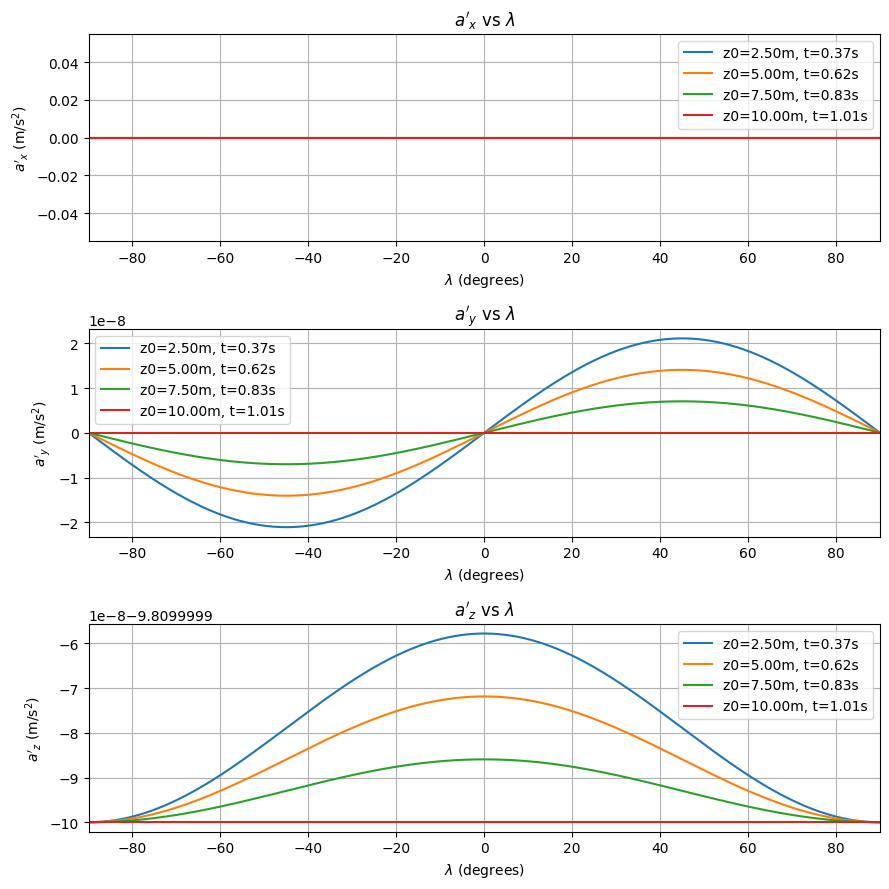

In [ ]:
# c.3) Para Centrífuga

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    # We only want the positive time
    return max(t1, t2)

# Function to calculate accelerations
def accelerations(lamda, t, H, v, g0, omega):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    # X-acceleration is zero in this case
    acceleration_x = 0
    # Y-acceleration
    acceleration_y = (omega**2) * (H + v * t - (1/2) * g0 * t**2) * np.cos(lamda_rad) * np.sin(lamda_rad)
    # Z-acceleration
    acceleration_z = -g0 + (omega**2) * (H + v * t - (1/2) * g0 * t**2) * np.cos(lamda_rad)**2
    return acceleration_x, acceleration_y, acceleration_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each acceleration component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        acc_x, acc_y, acc_z = accelerations(lamda, t, H, v, g0, omega)

        # Plot x-acceleration vs lambda (will be a flat line at 0)
        axs[0].plot(lamda, acc_x * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$a\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$a\' _x$ (m/s$^2$)')
        axs[0].legend()
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-acceleration vs lambda
        axs[1].plot(lamda, acc_y, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$a\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$a\' _y$ (m/s$^2$)')
        axs[1].legend()
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-acceleration vs lambda
        axs[2].plot(lamda, acc_z, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$a\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$a\' _z$ (m/s$^2$)')
        axs[2].legend()
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

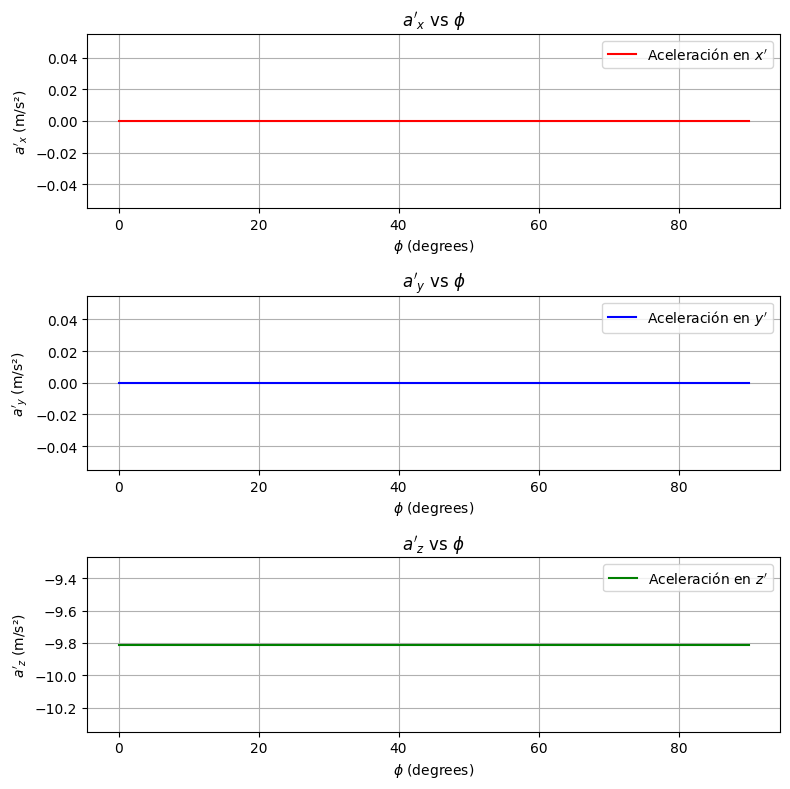

In [ ]:
# Calculate accelerations
acceleration_x = np.zeros_like(phi)  # X-acceleration is 0
acceleration_y = (omega**2) * (H + v * t - (1/2) * g0 * t**2) * np.cos(np.radians(lamda)) * np.sin(np.radians(lamda)) * np.zeros_like(phi)
acceleration_z = -g0 + (omega**2) * (H + v * t - (1/2) * g0 * t**2) * (np.cos(lamda)**2)

# Plot for acceleration_x
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(phi, acceleration_x, label="Aceleración en $x'$", color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _x$ (m/s²)')
plt.title('$a\' _x$ vs $\phi$')
plt.legend()
plt.grid(True)

# Plot for acceleration_y (which is now constant)
plt.subplot(3, 1, 2)
plt.plot(phi, acceleration_y, label="Aceleración en $y'$", color='blue')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _y$ (m/s²)')
plt.title('$a\' _y$ vs $\phi$')
plt.legend()
plt.grid(True)

# Plot for acceleration_z
plt.subplot(3, 1, 3)
plt.plot(phi, acceleration_z, label="Aceleración en $z'$", color='green')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _z$ (m/s²)')
plt.title('$a\' _z$ vs $\phi$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

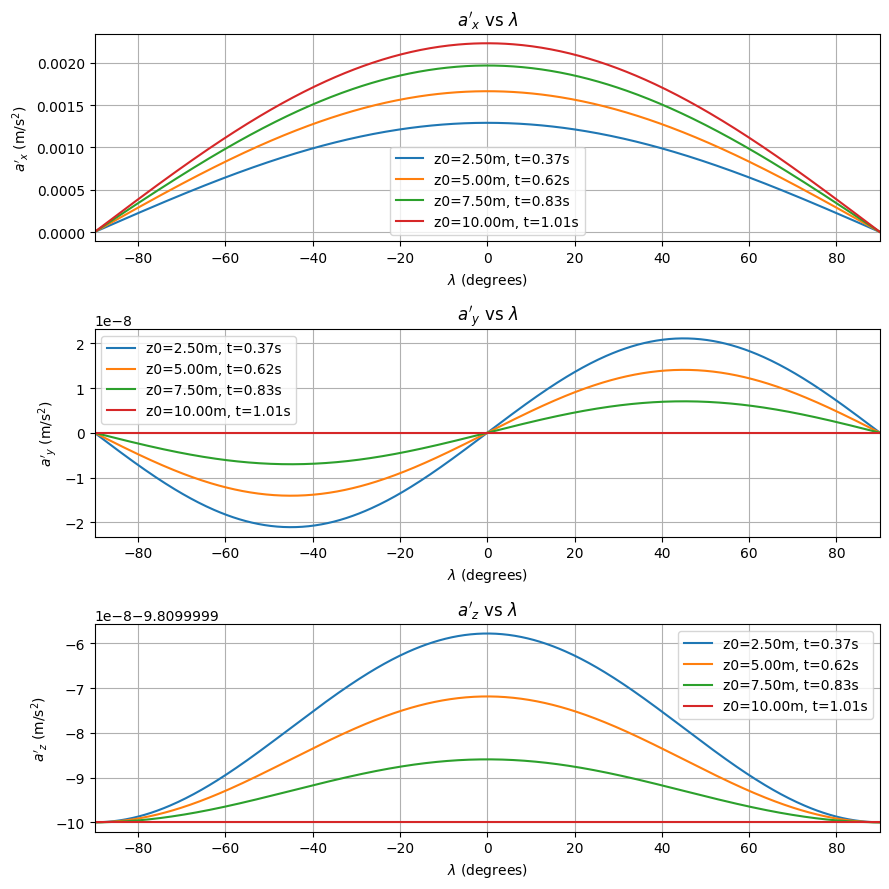

In [ ]:
# c.3) Considerando todos los efectos de rotación

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    # We only want the positive time
    return max(t1, t2)

# Function to calculate accelerations
def accelerations(lamda, t, H, v, g0, omega):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    # X-acceleration is zero in this case
    acceleration_x = -2 * omega * (v - g0 * t) * np.cos(lamda_rad)
    # Y-acceleration
    acceleration_y = (omega**2) * (H + v * t - (1/2) * g0 * t**2) * np.cos(lamda_rad) * np.sin(lamda_rad)
    # Z-acceleration
    acceleration_z = -g0 + (omega**2) * (H + v * t - (1/2) * g0 * t**2) * np.cos(lamda_rad)**2
    return acceleration_x, acceleration_y, acceleration_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each acceleration component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        acc_x, acc_y, acc_z = accelerations(lamda, t, H, v, g0, omega)

        # Plot x-acceleration vs lambda (will be a flat line at 0)
        axs[0].plot(lamda, acc_x * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$a\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$a\' _x$ (m/s$^2$)')
        axs[0].legend()
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-acceleration vs lambda
        axs[1].plot(lamda, acc_y, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$a\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$a\' _y$ (m/s$^2$)')
        axs[1].legend()
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-acceleration vs lambda
        axs[2].plot(lamda, acc_z, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$a\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$a\' _z$ (m/s$^2$)')
        axs[2].legend()
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

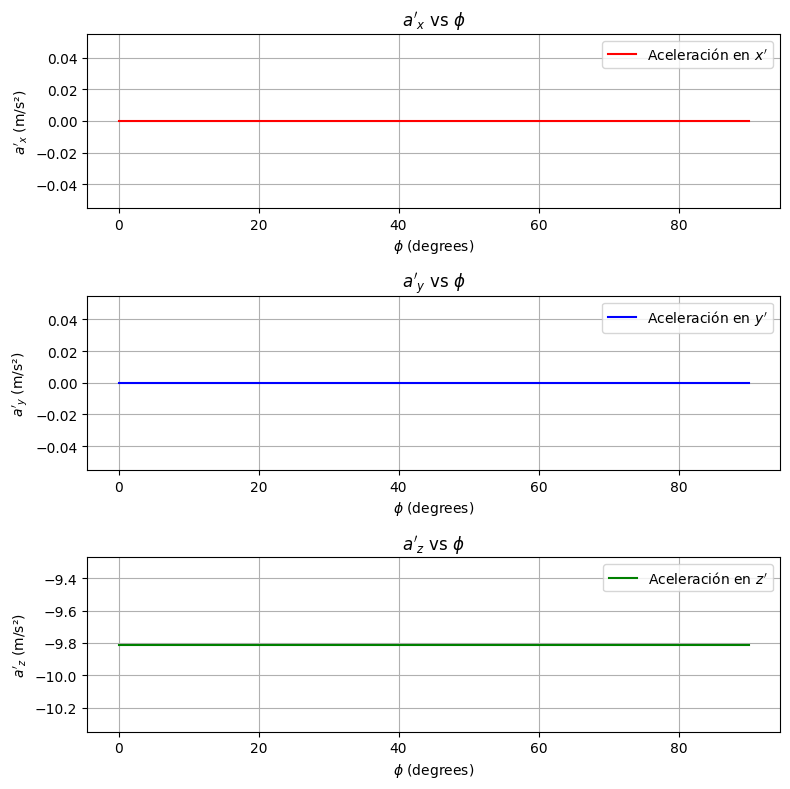

In [ ]:
# Calculate accelerations
acceleration_x = -2 * omega * (v - g0 * t) * np.cos(np.radians(lamda)) * np.zeros_like(phi)
acceleration_y = (omega**2) * (H + v * t - (1/2) * g0 * t**2) * np.cos(np.radians(lamda)) * np.sin(np.radians(lamda)) * np.zeros_like(phi)
acceleration_z = -g0 + (omega**2) * (H + v * t - (1/2) * g0 * t**2) * (np.cos(lamda)**2)

# Plot for acceleration_x
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(phi, acceleration_x, label="Aceleración en $x'$", color='red')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _x$ (m/s²)')
plt.title('$a\' _x$ vs $\phi$')
plt.legend()
plt.grid(True)

# Plot for acceleration_y (which is now constant)
plt.subplot(3, 1, 2)
plt.plot(phi, acceleration_y, label="Aceleración en $y'$", color='blue')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _y$ (m/s²)')
plt.title('$a\' _y$ vs $\phi$')
plt.legend()
plt.grid(True)

# Plot for acceleration_z
plt.subplot(3, 1, 3)
plt.plot(phi, acceleration_z, label="Aceleración en $z'$", color='green')
plt.xlabel('$\phi$ (degrees)')
plt.ylabel('$a\' _z$ (m/s²)')
plt.title('$a\' _z$ vs $\phi$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

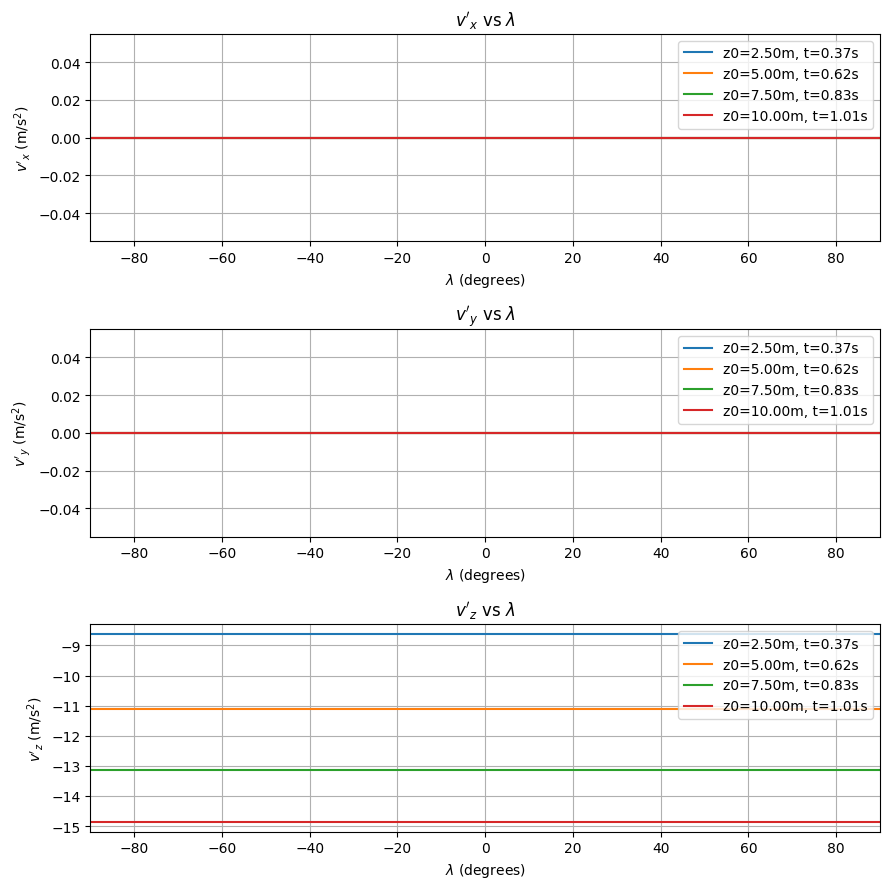

In [ ]:
# d.1) Ignorando rotaciones

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    # We only want the positive time
    return max(t1, t2)

# Function to calculate velocities
def velocities(lamda, t, H, v, g0, omega):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    velocity_x = np.zeros_like(lamda)
    velocity_y = np.zeros_like(lamda)  # Zero velocity in x and y-direction because the initial velocity components are zero
    velocity_z = v - g0 * t * np.ones_like(lamda)
    return velocity_x, velocity_y, velocity_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x, v_y, v_z = velocities(lamda, t, H, v, g0, omega)

        # Plot x-velocity vs lambda (will be a flat line at 0)
        axs[0].plot(lamda, v_x * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$v\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s$^2$)')
        axs[0].legend()
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-velocity vs lambda
        axs[1].plot(lamda, v_y, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$v\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s$^2$)')
        axs[1].legend()
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-velocity vs lambda
        axs[2].plot(lamda, v_z, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$v\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s$^2$)')
        axs[2].legend()
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

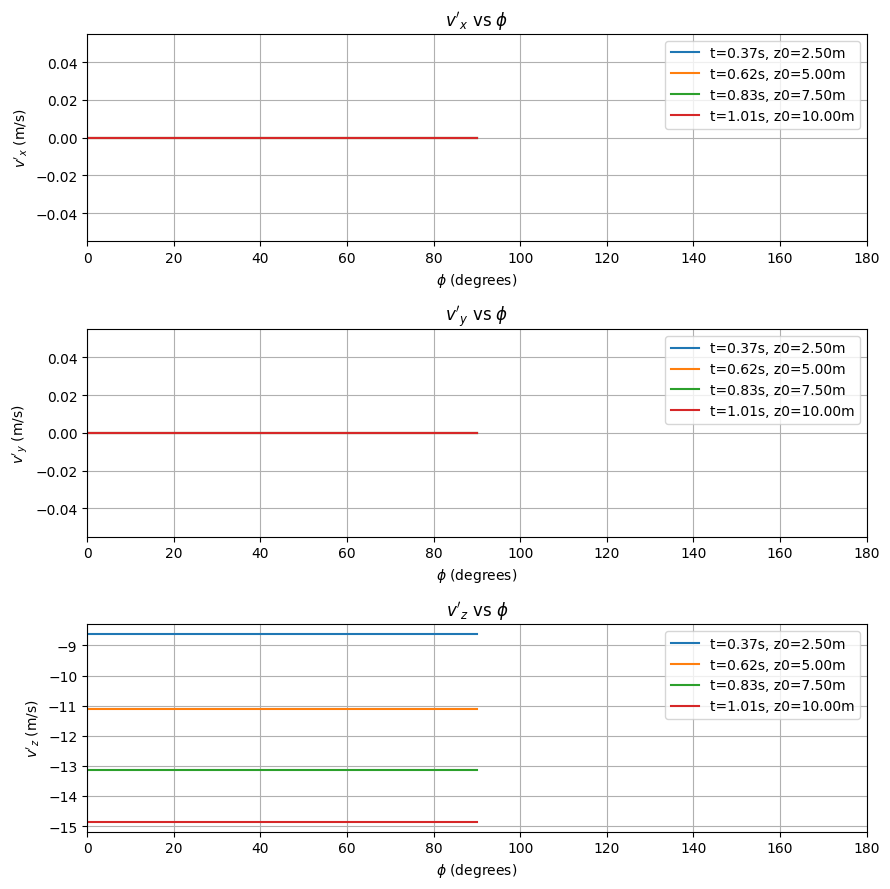

In [ ]:
# Long plots

def velocities_phi(phi, t, v, g0):
    velocity_x = np.zeros_like(phi)  # Zero velocity in x direction
    velocity_y = np.zeros_like(phi)  # Zero velocity in y direction
    velocity_z = v - g0 * t * np.ones_like(phi)  # Vertical velocity as a function of time
    return velocity_x, velocity_y, velocity_z

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    return max(t1, t2)  # We only want the positive time

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each acceleration component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x_phi, v_y_phi, v_z_phi = velocities_phi(phi, t, v, g0)

        # Plot velocity_x vs phi
        axs[0].plot(phi, v_x_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[0].set_title('$v\' _x$ vs $\phi$')
        axs[0].set_xlabel('$\phi$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s)')
        axs[0].set_xlim([0, 180])
        axs[0].legend()
        axs[0].grid(True)

        # Plot velocity_y vs phi
        axs[1].plot(phi, v_y_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[1].set_title('$v\' _y$ vs $\phi$')
        axs[1].set_xlabel('$\phi$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s)')
        axs[1].set_xlim([0, 180])
        axs[1].legend()
        axs[1].grid(True)

        # Plot velocity_z vs phi
        axs[2].plot(phi, v_z_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[2].set_title('$v\' _z$ vs $\phi$')
        axs[2].set_xlabel('$\phi$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s)')
        axs[2].set_xlim([0, 180])
        axs[2].legend()
        axs[2].grid(True)

# Adjust layout and show the plots for phi
plt.tight_layout()
plt.show()

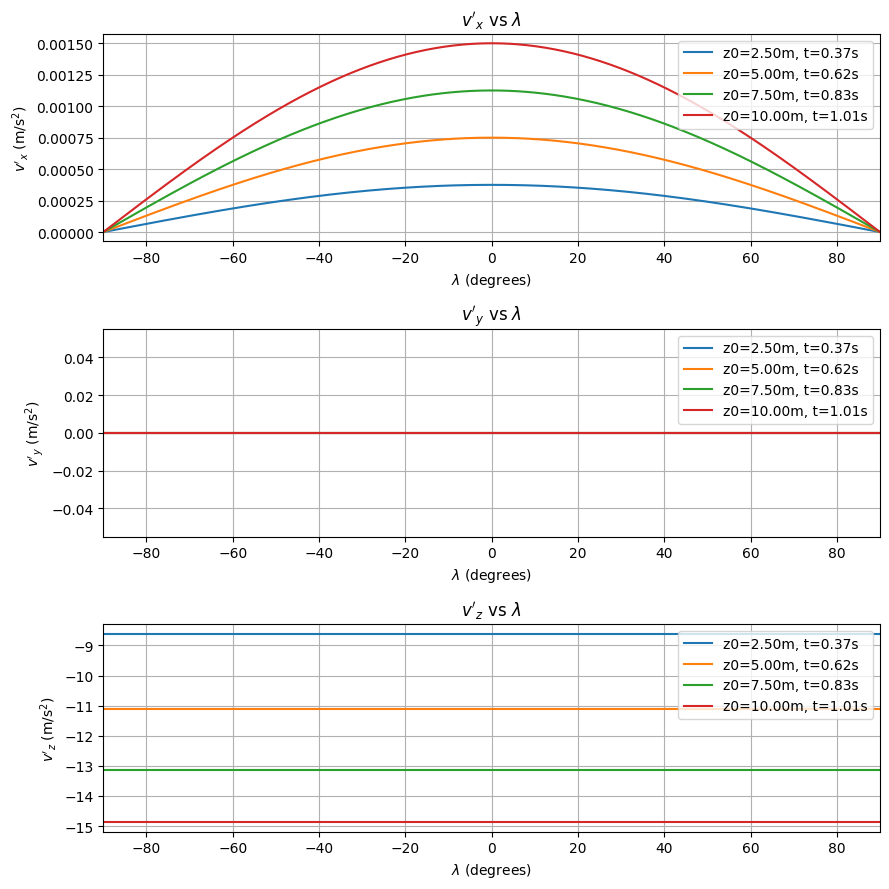

In [ ]:
# d.2) Considerando Coriolis

def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    # We only want the positive time
    return max(t1, t2)

# Function to calculate velocities
def velocities(lamda, t, H, v, g0, omega):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    velocity_x = -2 * omega * v * np.cos(lamda_rad) * t + g0 * omega * np.cos(lamda_rad) * t**2
    velocity_y = np.zeros_like(lamda)  # Zero velocity in x and y-direction because the initial velocity components are zero
    velocity_z = v - g0 * t * np.ones_like(lamda)
    return velocity_x, velocity_y, velocity_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x, v_y, v_z = velocities(lamda, t, H, v, g0, omega)

        # Plot x-velocity vs lambda (will be a flat line at 0)
        axs[0].plot(lamda, v_x * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$v\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s$^2$)')
        axs[0].legend()
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-velocity vs lambda
        axs[1].plot(lamda, v_y, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$v\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s$^2$)')
        axs[1].legend()
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-velocity vs lambda
        axs[2].plot(lamda, v_z, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$v\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s$^2$)')
        axs[2].legend()
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

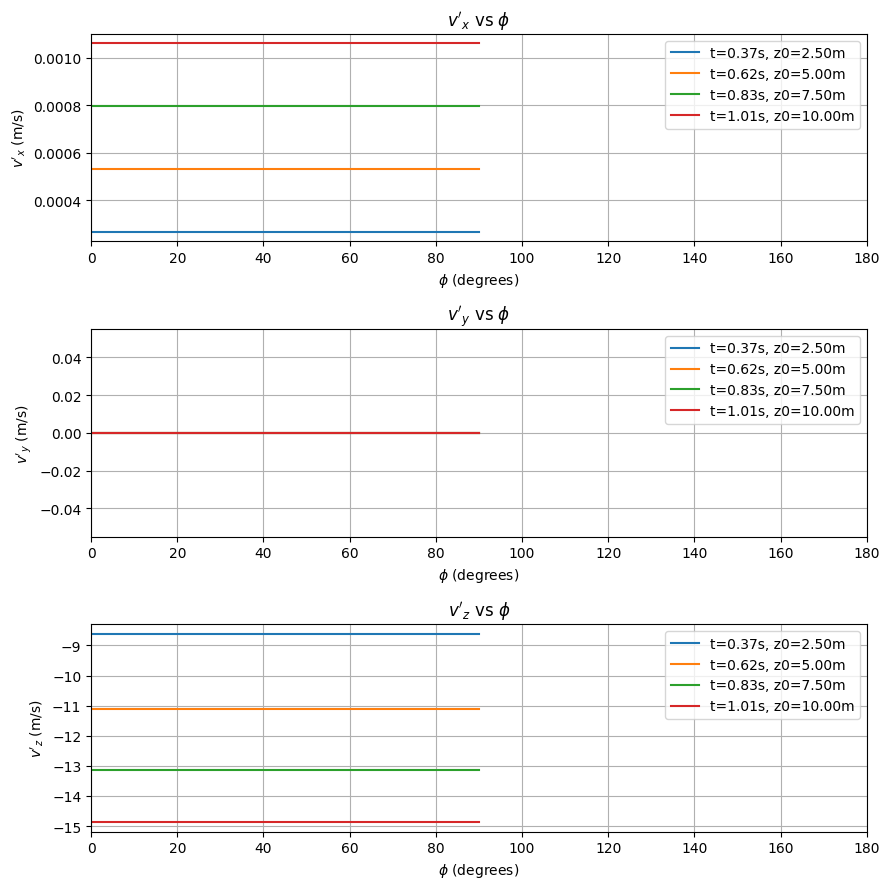

In [ ]:
# Long plots

# Function to calculate velocities
def velocities_phi(phi, t, lamda, v, g0):
    lamda_rad = np.radians(45)
    # Correct the expression without multiplying by zeros_like(phi)
    velocity_x = (-2 * omega * v * np.cos(lamda_rad) * t + g0 * omega * np.cos(lamda_rad) * t**2) * np.ones_like(phi)
    velocity_y = np.zeros_like(phi)  # Zero velocity in y direction
    velocity_z = v - g0 * t * np.ones_like(phi)  # Vertical velocity
    return velocity_x, velocity_y, velocity_z

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    return max(t1, t2)  # We only want the positive time

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))  # Only plotting v_x and v_z

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x_phi, v_y_phi, v_z_phi = velocities_phi(phi, t, lamda, v, g0)

        # Plot velocity_x vs phi
        axs[0].plot(phi, v_x_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[0].set_title('$v\' _x$ vs $\phi$')
        axs[0].set_xlabel('$\phi$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s)')
        axs[0].set_xlim([0, 180])
        axs[0].legend()
        axs[0].grid(True)

        # Plot velocity_y vs phi
        axs[1].plot(phi, v_y_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[1].set_title('$v\' _y$ vs $\phi$')
        axs[1].set_xlabel('$\phi$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s)')
        axs[1].set_xlim([0, 180])
        axs[1].legend()
        axs[1].grid(True)

        # Plot velocity_z vs phi
        axs[2].plot(phi, v_z_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[2].set_title('$v\' _z$ vs $\phi$')
        axs[2].set_xlabel('$\phi$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s)')
        axs[2].set_xlim([0, 180])
        axs[2].legend()
        axs[2].grid(True)

# Adjust layout and show the plots for phi
plt.tight_layout()
plt.show()

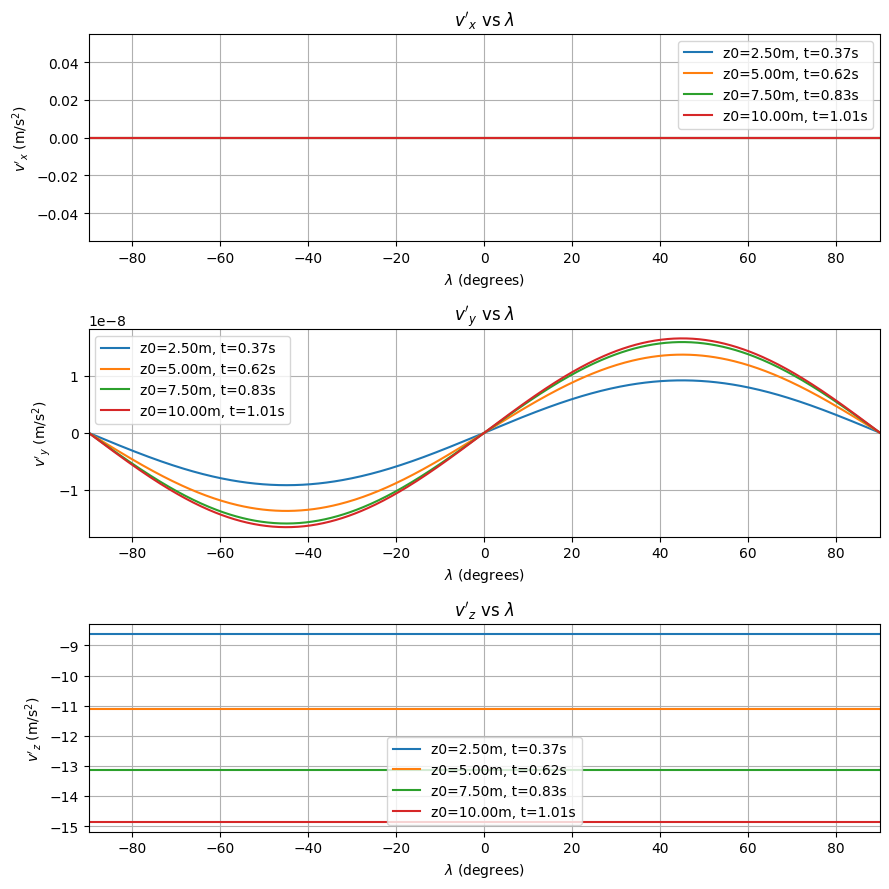

In [ ]:
# d.3) Considerando Centrifuga

# Function to calculate velocities
def velocities(lamda, t, H, v, g0, omega):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    velocity_x = np.zeros_like(lamda)  # Zero velocity in x direction
    velocity_y = (omega**2) * (H * t + (1 / 2) * v * t**2 - (1/6) * g0 * t**3) * np.cos(lamda_rad) * np.sin(lamda_rad)
    velocity_z = v - g0 * t + omega**2 * (H * t + (1 / 2) * v * t**2 - (1 / 6) * g0 * t**3) * np.cos(lamda_rad)**2
    return velocity_x, velocity_y, velocity_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x, v_y, v_z = velocities(lamda, t, H, v, g0, omega)

        # Plot x-velocity vs lambda (will be a flat line at 0)
        axs[0].plot(lamda, v_x * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$v\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s$^2$)')
        axs[0].legend()
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-velocity vs lambda
        axs[1].plot(lamda, v_y, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$v\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s$^2$)')
        axs[1].legend()
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-velocity vs lambda
        axs[2].plot(lamda, v_z, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$v\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s$^2$)')
        axs[2].legend()
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

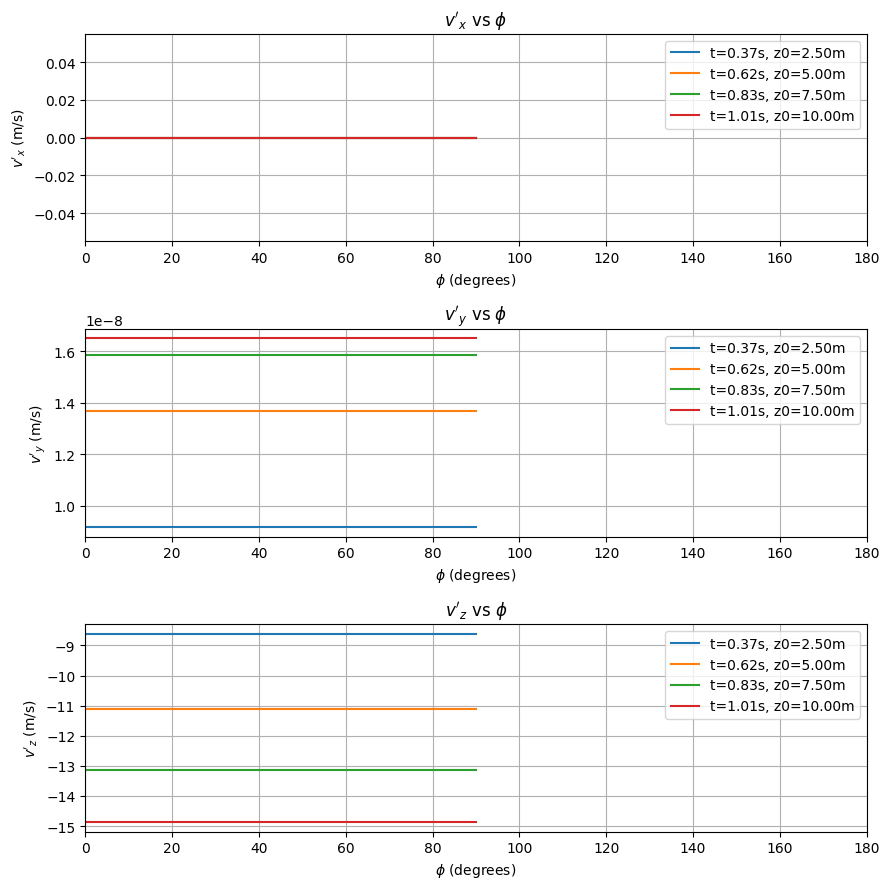

In [ ]:
# Long plots

def velocities_phi(phi, t, lamda, v, g0):
    lamda_rad = np.radians(45)
    velocity_x = np.zeros_like(phi)  # Zero velocity in x direction
    velocity_y = (omega**2) * (H * t + (1 / 2) * v * t**2 - (1/6) * g0 * t**3) * np.cos(lamda_rad) * np.sin(lamda_rad) * np.ones_like(phi)
    velocity_z = (v - g0 * t + omega**2 * (H * t + (1 / 2) * v * t**2 - (1 / 6) * g0 * t**3) * np.cos(lamda_rad)**2) * np.ones_like(phi)
    return velocity_x, velocity_y, velocity_z

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    return max(t1, t2)  # We only want the positive time

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))  # Only plotting v_x and v_z

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x_phi, v_y_phi, v_z_phi = velocities_phi(phi, t, lamda, v, g0)

        # Plot velocity_x vs phi
        axs[0].plot(phi, v_x_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[0].set_title('$v\' _x$ vs $\phi$')
        axs[0].set_xlabel('$\phi$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s)')
        axs[0].set_xlim([0, 180])
        axs[0].legend()
        axs[0].grid(True)

        # Plot velocity_y vs phi
        axs[1].plot(phi, v_y_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[1].set_title('$v\' _y$ vs $\phi$')
        axs[1].set_xlabel('$\phi$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s)')
        axs[1].set_xlim([0, 180])
        axs[1].legend()
        axs[1].grid(True)

        # Plot velocity_z vs phi
        axs[2].plot(phi, v_z_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[2].set_title('$v\' _z$ vs $\phi$')
        axs[2].set_xlabel('$\phi$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s)')
        axs[2].set_xlim([0, 180])
        axs[2].legend()
        axs[2].grid(True)

# Adjust layout and show the plots for phi
plt.tight_layout()
plt.show()

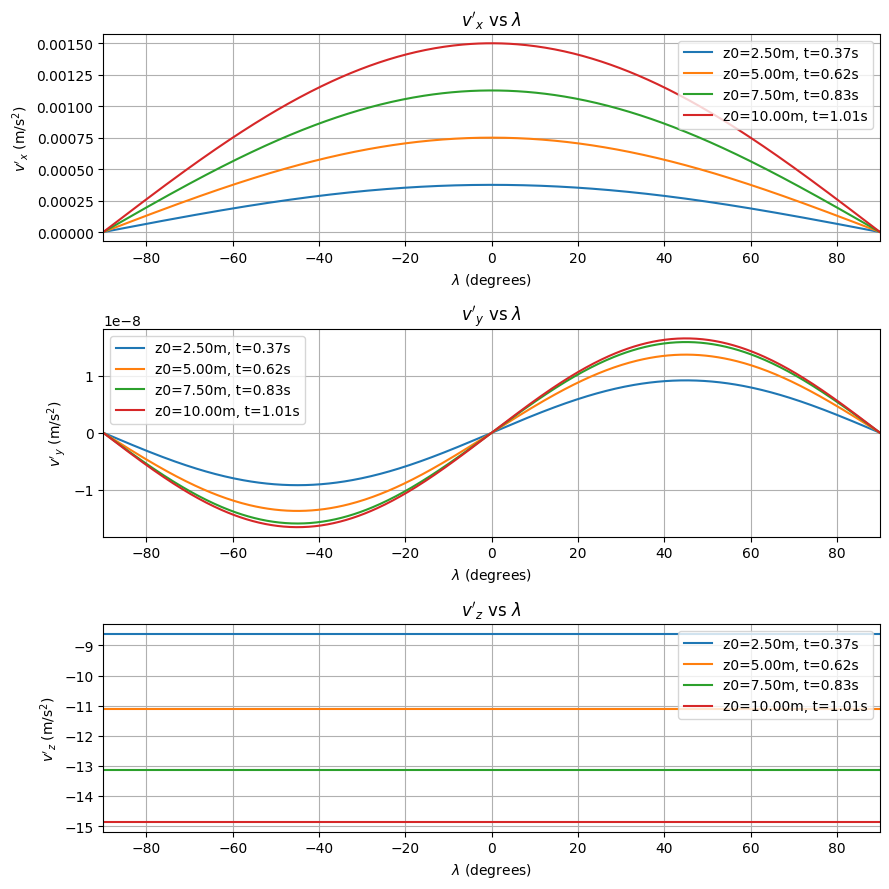

In [ ]:
# d.4) Considerando todos los efectos de rotación

def velocities(lamda, t, H, v, g0, omega):
    # Convert degrees to radians for calculations
    lamda_rad = np.radians(lamda)
    velocity_x = -2 * omega * v * np.cos(lamda_rad) * t + g0 * omega * np.cos(lamda_rad) * t**2
    velocity_y = (omega**2) * (H * t + (1 / 2) * v * t**2 - (1/6) * g0 * t**3) * np.cos(lamda_rad) * np.sin(lamda_rad)
    velocity_z = v - g0 * t + omega**2 * (H * t + (1 / 2) * v * t**2 - (1 / 6) * g0 * t**3) * np.cos(lamda_rad)**2
    return velocity_x, velocity_y, velocity_z

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x, v_y, v_z = velocities(lamda, t, H, v, g0, omega)

        # Plot x-velocity vs lambda (will be a flat line at 0)
        axs[0].plot(lamda, v_x * np.ones_like(lamda), label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[0].set_title('$v\' _x$ vs $\lambda$')
        axs[0].set_xlabel('$\lambda$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s$^2$)')
        axs[0].legend()
        axs[0].set_xlim([-90, 90])  # Set x-axis limits
        axs[0].grid(True)

        # Plot y-velocity vs lambda
        axs[1].plot(lamda, v_y, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[1].set_title('$v\' _y$ vs $\lambda$')
        axs[1].set_xlabel('$\lambda$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s$^2$)')
        axs[1].legend()
        axs[1].set_xlim([-90, 90])  # Set x-axis limits
        axs[1].grid(True)

        # Plot z-velocity vs lambda
        axs[2].plot(lamda, v_z, label=f'z0={z0:.2f}m, t={t:.2f}s')
        axs[2].set_title('$v\' _z$ vs $\lambda$')
        axs[2].set_xlabel('$\lambda$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s$^2$)')
        axs[2].legend()
        axs[2].set_xlim([-90, 90])  # Set x-axis limits
        axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

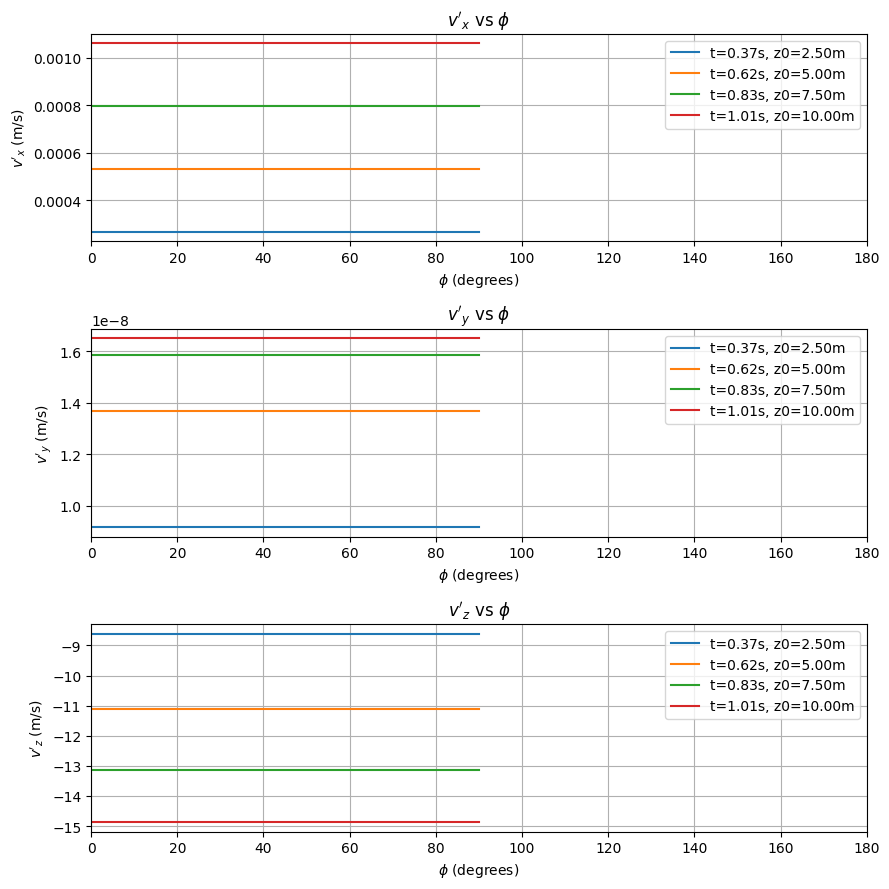

In [ ]:
# Long plots

def velocities_phi(phi, t, lamda, v, g0):
    lamda_rad = np.radians(45)
    velocity_x = (-2 * omega * v * np.cos(lamda_rad) * t + g0 * omega * np.cos(lamda_rad) * t**2) * np.ones_like(phi)
    velocity_y = (omega**2) * (H * t + (1 / 2) * v * t**2 - (1/6) * g0 * t**3) * np.cos(lamda_rad) * np.sin(lamda_rad) * np.ones_like(phi)
    velocity_z = (v - g0 * t + omega**2 * (H * t + (1 / 2) * v * t**2 - (1 / 6) * g0 * t**3) * np.cos(lamda_rad)**2) * np.ones_like(phi)
    return velocity_x, velocity_y, velocity_z

# Function to calculate the positive time to hit the ground
def find_time(v, g0, z0):
    discriminant = v**2 + 2 * g0 * z0
    if discriminant < 0:
        return None  # No real solution
    t1 = (v + np.sqrt(discriminant)) / g0
    t2 = (v - np.sqrt(discriminant)) / g0
    return max(t1, t2)  # We only want the positive time

# Initial heights
z0_values = [H/4, H/2, 3*H/4, H]

# Calculate the t-values for each z0 using the positive solution
t_values = [find_time(v, g0, z0) for z0 in z0_values]

# Create subplots for each velocity component
fig, axs = plt.subplots(3, 1, figsize=(9, 9))  # Only plotting v_x and v_z

# Plot for each z0 and corresponding t
for i, z0 in enumerate(z0_values):
    t = t_values[i]  # Use the calculated positive time for each z0
    if t is not None:  # Ensure that there's a valid solution for t
        v_x_phi, v_y_phi, v_z_phi = velocities_phi(phi, t, lamda, v, g0)

        # Plot velocity_x vs phi
        axs[0].plot(phi, v_x_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[0].set_title('$v\' _x$ vs $\phi$')
        axs[0].set_xlabel('$\phi$ (degrees)')
        axs[0].set_ylabel('$v\' _x$ (m/s)')
        axs[0].set_xlim([0, 180])
        axs[0].legend()
        axs[0].grid(True)

        # Plot velocity_y vs phi
        axs[1].plot(phi, v_y_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[1].set_title('$v\' _y$ vs $\phi$')
        axs[1].set_xlabel('$\phi$ (degrees)')
        axs[1].set_ylabel('$v\' _y$ (m/s)')
        axs[1].set_xlim([0, 180])
        axs[1].legend()
        axs[1].grid(True)

        # Plot velocity_z vs phi
        axs[2].plot(phi, v_z_phi, label=f't={t:.2f}s, z0={z0:.2f}m')
        axs[2].set_title('$v\' _z$ vs $\phi$')
        axs[2].set_xlabel('$\phi$ (degrees)')
        axs[2].set_ylabel('$v\' _z$ (m/s)')
        axs[2].set_xlim([0, 180])
        axs[2].legend()
        axs[2].grid(True)

# Adjust layout and show the plots for phi
plt.tight_layout()
plt.show()